In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df0 = pd.read_csv('HR_comma_sep.csv')
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'
                          })

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [7]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [8]:
df0.duplicated().sum()

np.int64(3008)

In [9]:
df1 = df0.drop_duplicates(keep='first')
df1.duplicated().sum()

np.int64(0)

In [10]:
print(df1['left'].value_counts())

print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


In [11]:
def bar_plot_comparison(df, column_name, column_title):
  grouped = df.groupby([column_name, 'left']).size().unstack(fill_value=0)
  normalized = grouped.div(grouped.sum(axis=1), axis=0)
  fig, axes = plt.subplots(1, 2, figsize=(14, 6))

  # Left: Grouped Bar Chart (Absolute Counts)
  grouped.plot(
      kind='bar',
      ax=axes[0],
      color=['#1f77b4', '#ff7f0e']
  )
  axes[0].set_title(f'Employee Count by {column_title}')
  axes[0].set_xlabel(column_title)
  axes[0].set_ylabel('Count')
  axes[0].legend(title='Left', labels=['Stayed', 'Left'])
  axes[0].grid(axis='y', linestyle='--', alpha=0.7)

  # Right: Stacked Normalized Bar Chart (Proportions)
  normalized.plot(
      kind='bar',
      stacked=True,
      ax=axes[1],
      color=['#1f77b4', '#ff7f0e']
  )
  axes[1].set_title(f'Proportion of Employees Leaving by {column_title}')
  axes[1].set_xlabel(column_title)
  axes[1].set_ylabel('Proportion')
  axes[1].legend(title='Left', labels=['Stayed', 'Left'])
  axes[1].grid(axis='y', linestyle='--', alpha=0.7)

  plt.tight_layout()
  plt.show()


In [13]:
def histogram_comparison(df, column_name, column_title):
  # Bin settings
  bins = np.linspace(df1[column_name].min(), df1[column_name].max(), 20)
  fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

  # Left: Grouped histogram (Absolute Counts)
  axes[0].hist(
      [df1[df1['left'] == 0][column_name], df1[df1['left'] == 1][column_name]],
      bins=bins,
      color=['#1f77b4', '#ff7f0e'],
      label=['Stayed (0)', 'Left (1)'],
      stacked=False,
      alpha=0.7
  )
  axes[0].set_title(f'Distribution of Emplyees by {column_title}')
  axes[0].set_xlabel(column_title)
  axes[0].set_ylabel('Count')
  axes[0].legend()
  axes[0].grid(axis='y', linestyle='--', alpha=0.7)

  # Right Stacked Normalized Histogram (Proportions)
  # Calculate counts per bin
  hist_0, _ = np.histogram(df1[df1['left'] == 0][column_name], bins=bins)
  hist_1, _ = np.histogram(df1[df1['left'] == 1][column_name], bins=bins)
  total = hist_0 + hist_1

  # Avoid division by zero
  total[total == 0] = 1
  normalized_0 = hist_0 / total
  normalized_1 = hist_1 / total

  axes[1].bar(bins[:-1], normalized_0, width=np.diff(bins), color='#1f77b4', label='Stayed (0)', align='edge')
  axes[1].bar(bins[:-1], normalized_1, width=np.diff(bins), bottom=normalized_0, color='#ff7f0e', label='Left (1)', align='edge')

  axes[1].set_title(f'Proportion of Emplyees leaving by {column_title}')
  axes[1].set_xlabel(column_title)
  axes[1].set_ylabel('Proportion')
  axes[1].legend()
  axes[1].grid(axis='y', linestyle='--', alpha=0.7)

  plt.tight_layout()
  plt.show()


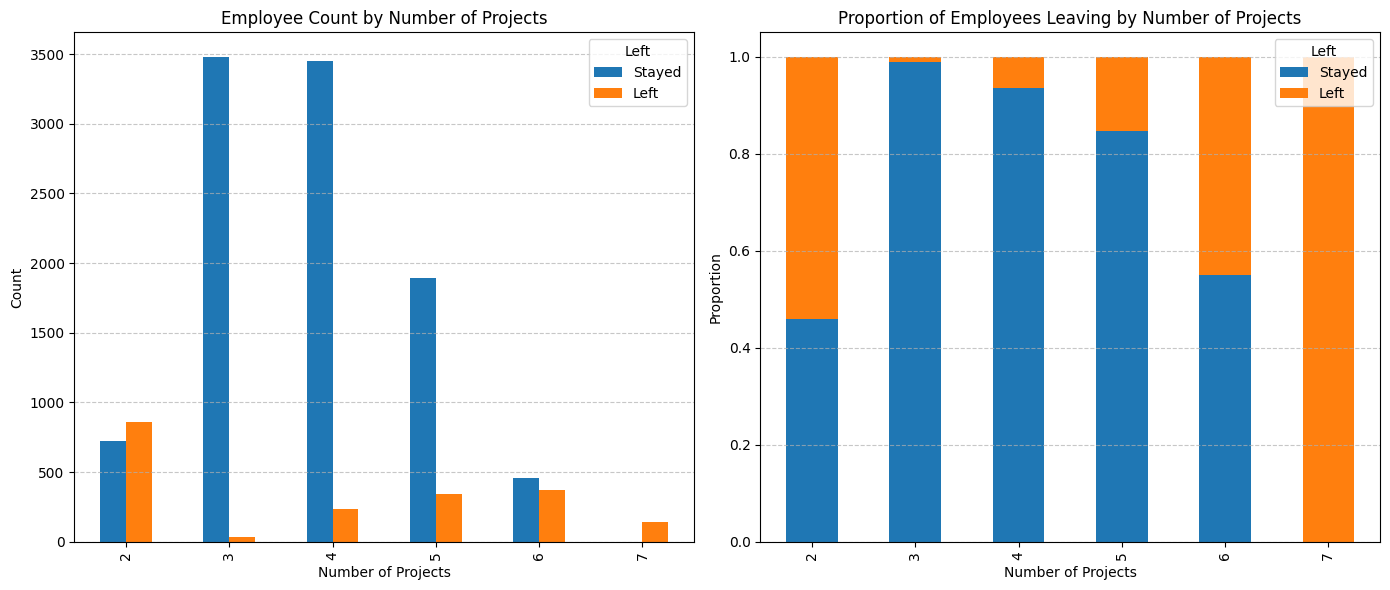

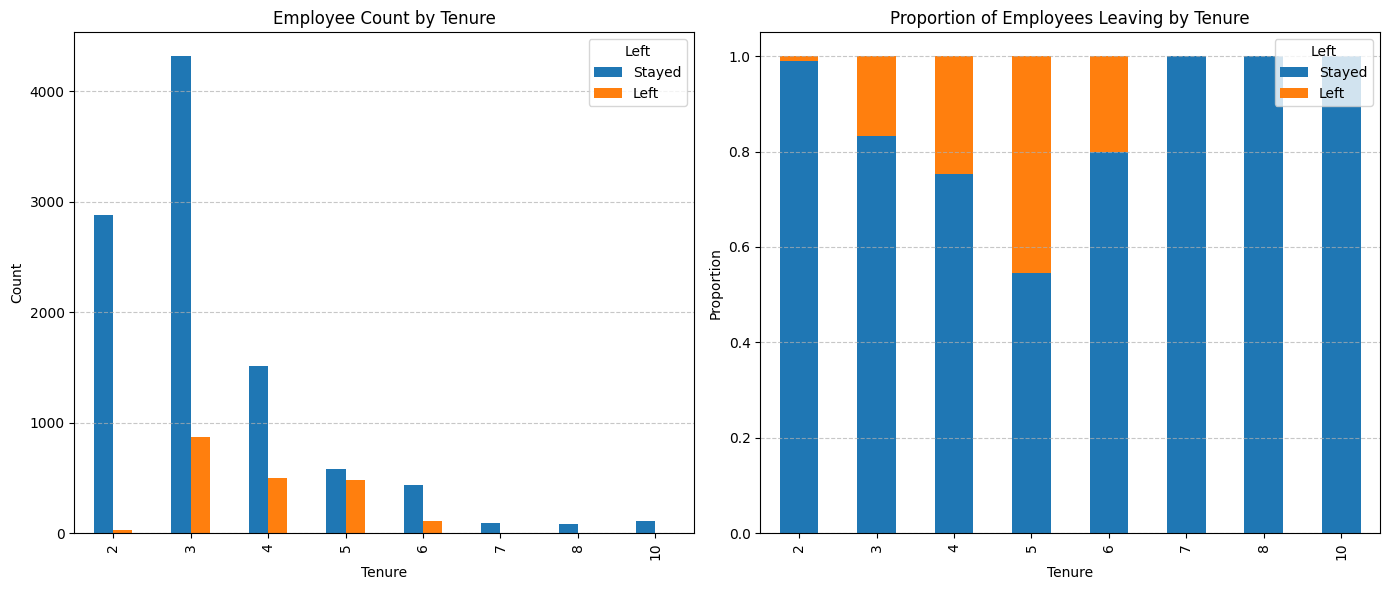

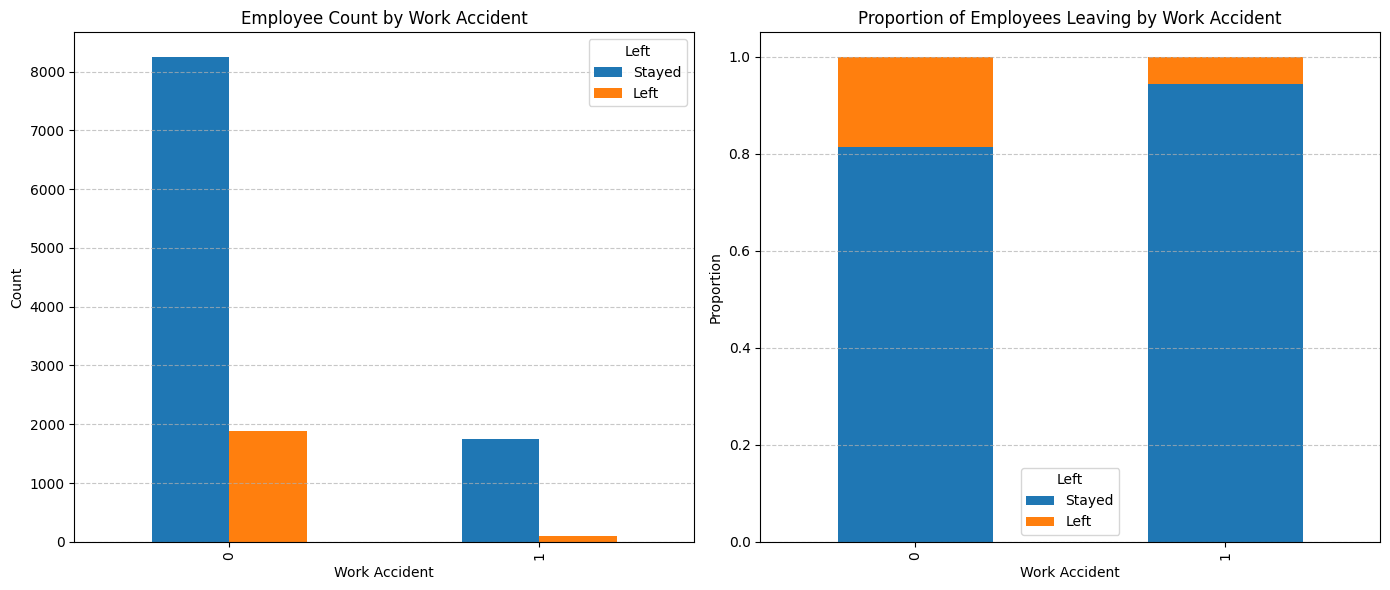

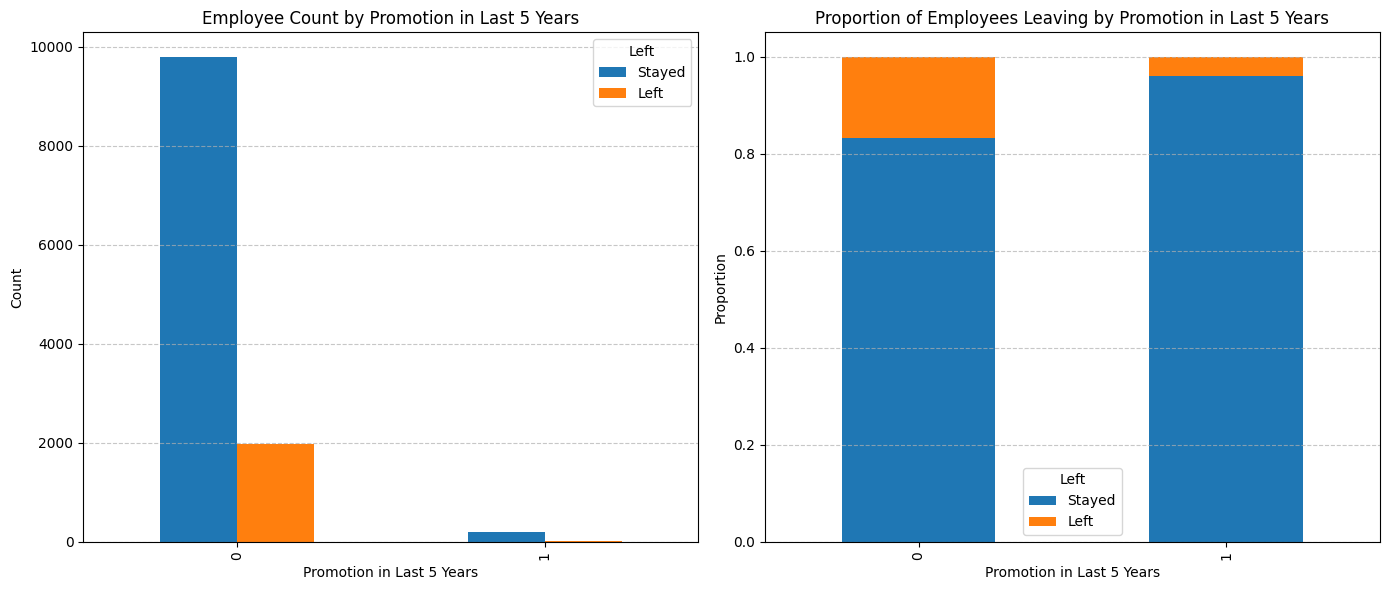

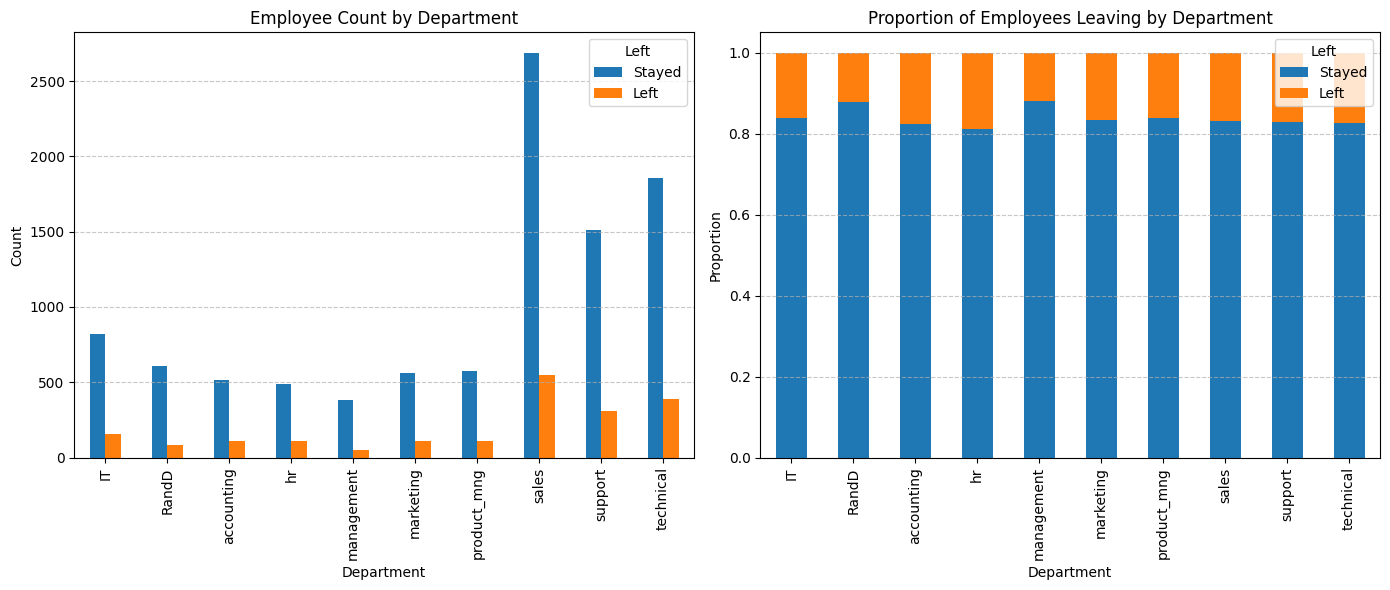

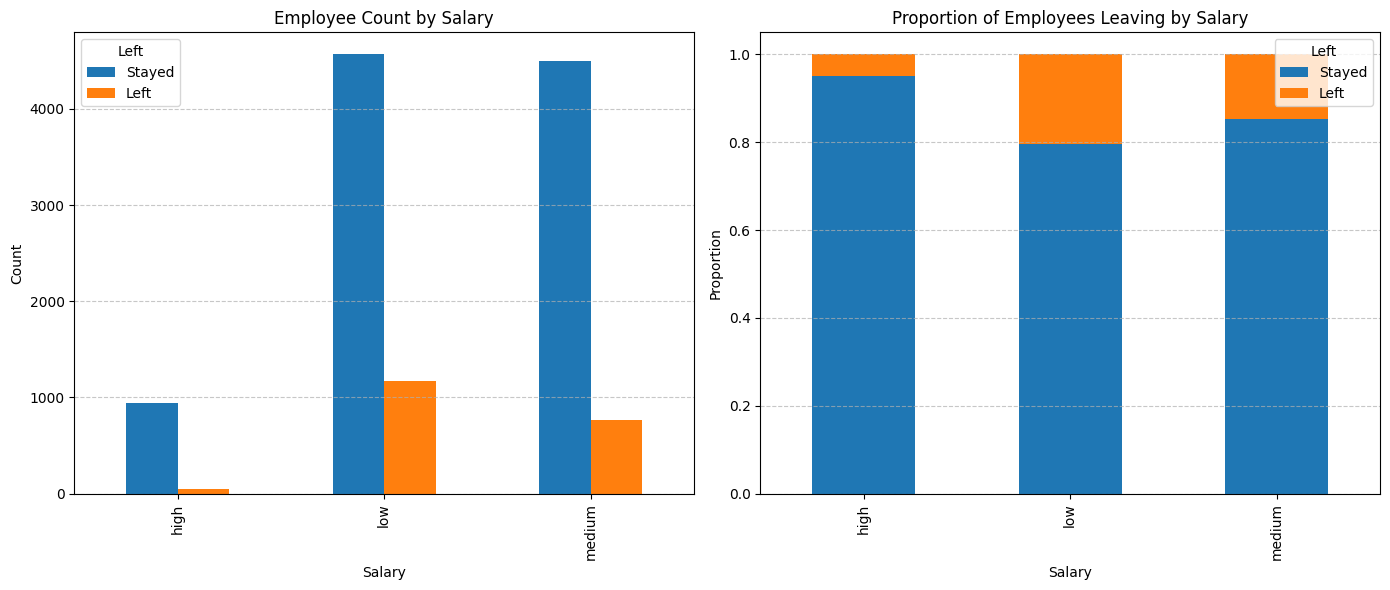

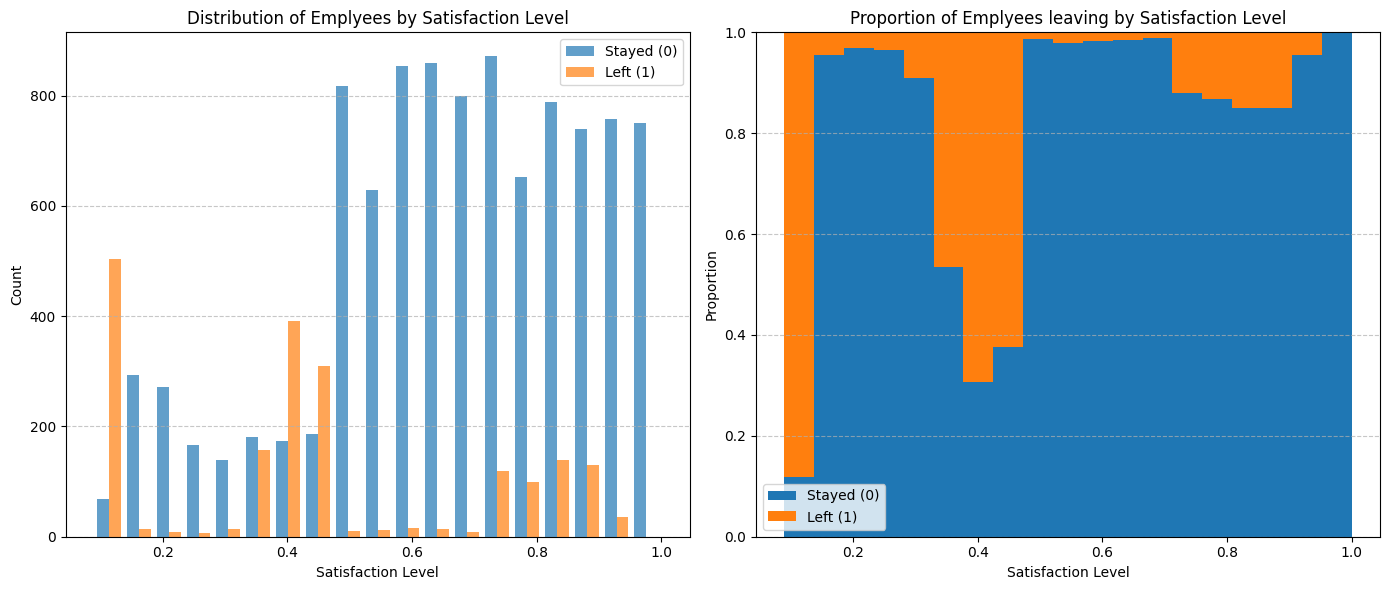

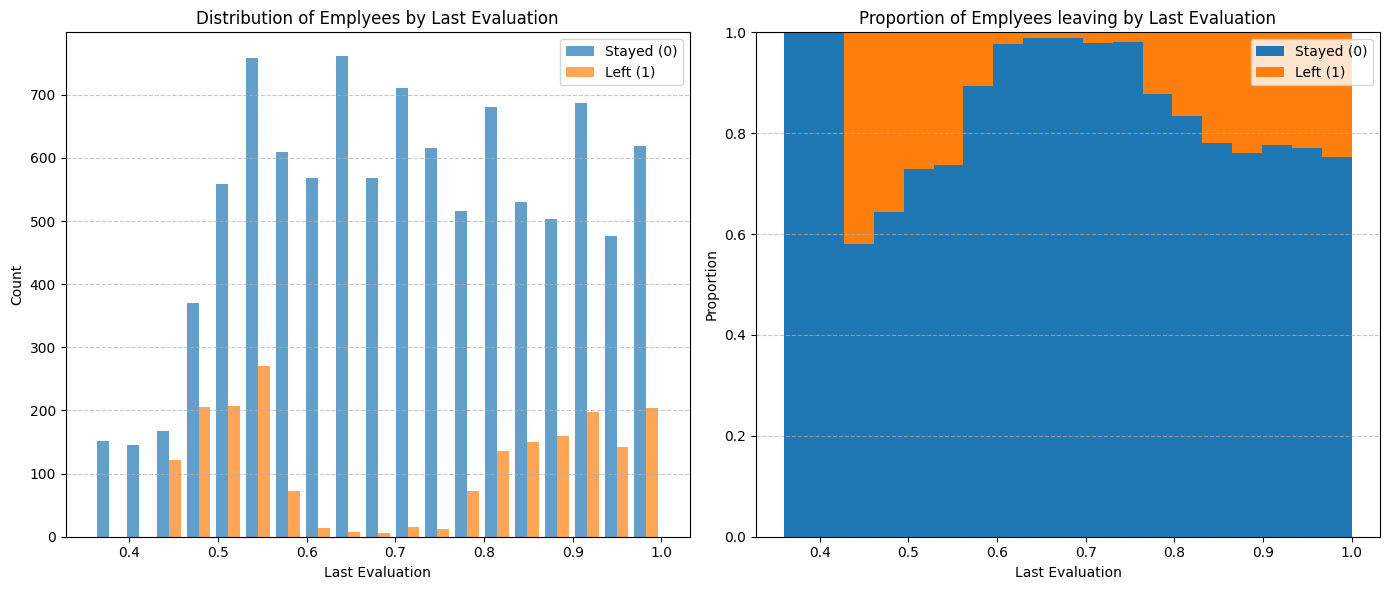

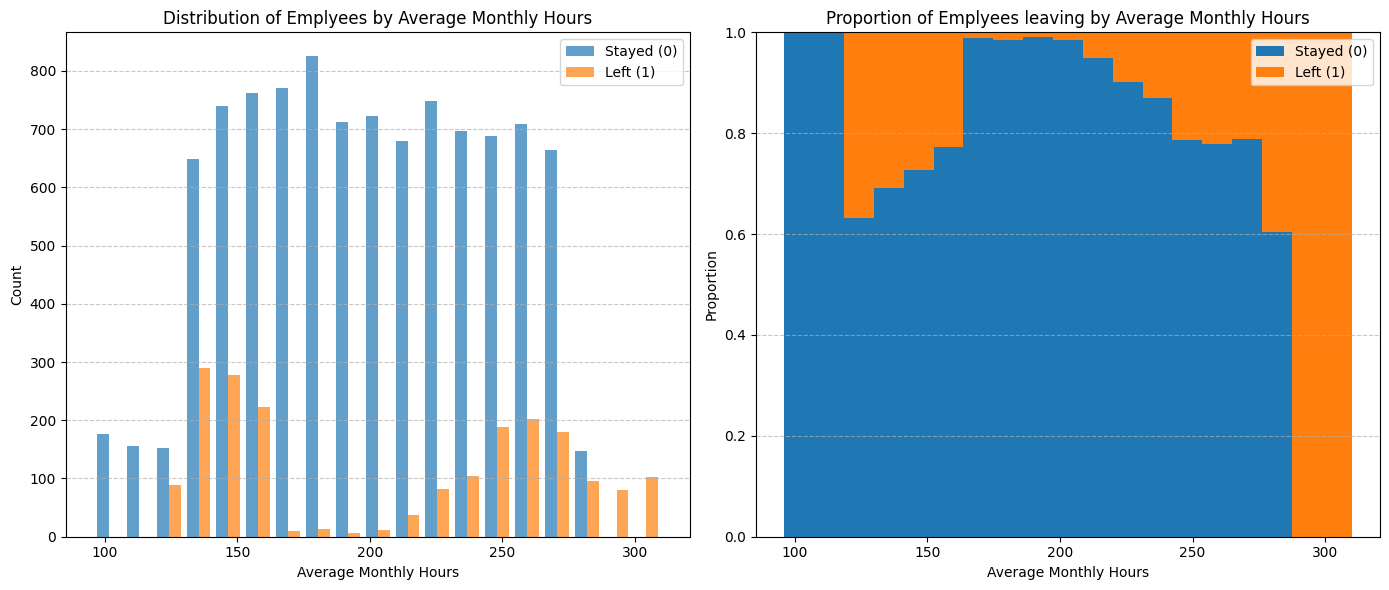

In [14]:
column_names = ['number_project', 'tenure', 'work_accident', 'promotion_last_5years', 'department', 'salary']
column_titles = ['Number of Projects', 'Tenure', 'Work Accident', 'Promotion in Last 5 Years', 'Department', 'Salary']

for column_name, column_title in zip(column_names, column_titles):
  bar_plot_comparison(df1, column_name, column_title)

column_names = ['satisfaction_level', 'last_evaluation', 'average_monthly_hours']
column_titles = ['Satisfaction Level', 'Last Evaluation', 'Average Monthly Hours']

for column_name, column_title in zip(column_names, column_titles):
  histogram_comparison(df1, column_name, column_title)

In [15]:
def scatter_plot_comparison(df, column_name_X, column_name_Y, column_title_X, column_title_Y):

  plt.figure(figsize=(16, 9))

  # Plot left = 0 (faded)
  plt.scatter(
      df1[df1['left'] == 0][column_name_X],
      df1[df1['left'] == 0][column_name_Y],
      color='#1f77b4',
      label='Stayed',
      alpha=0.4,
  )

  # Plot left = 1 (highlighted)
  plt.scatter(
      df1[df1['left'] == 1][column_name_X],
      df1[df1['left'] == 1][column_name_Y],
      color='#ff7f0e',
      label='Left',
      alpha=0.4,
  )

  plt.title(f'{column_title_X} vs {column_title_Y} (Highlighting Employees Who Left)')
  plt.xlabel(column_title_X)
  plt.ylabel(column_title_Y)
  plt.legend()
  plt.show()


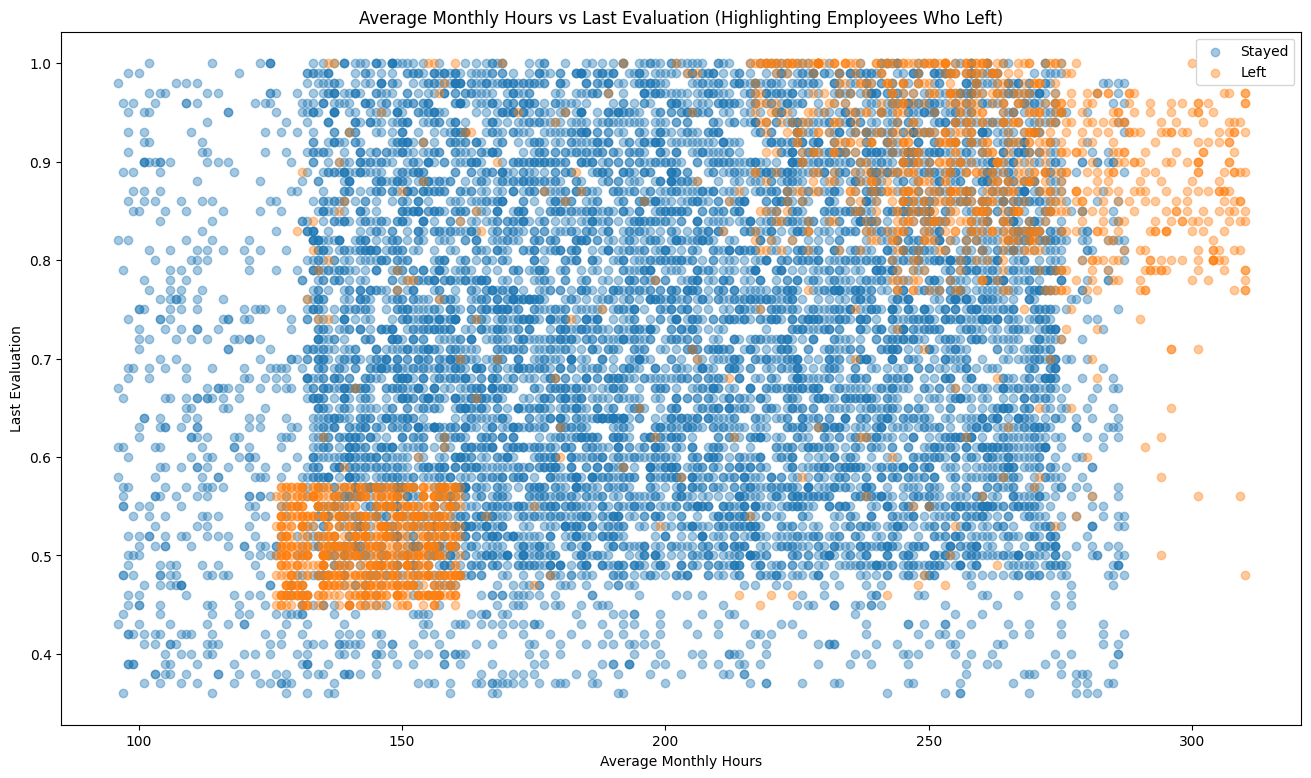

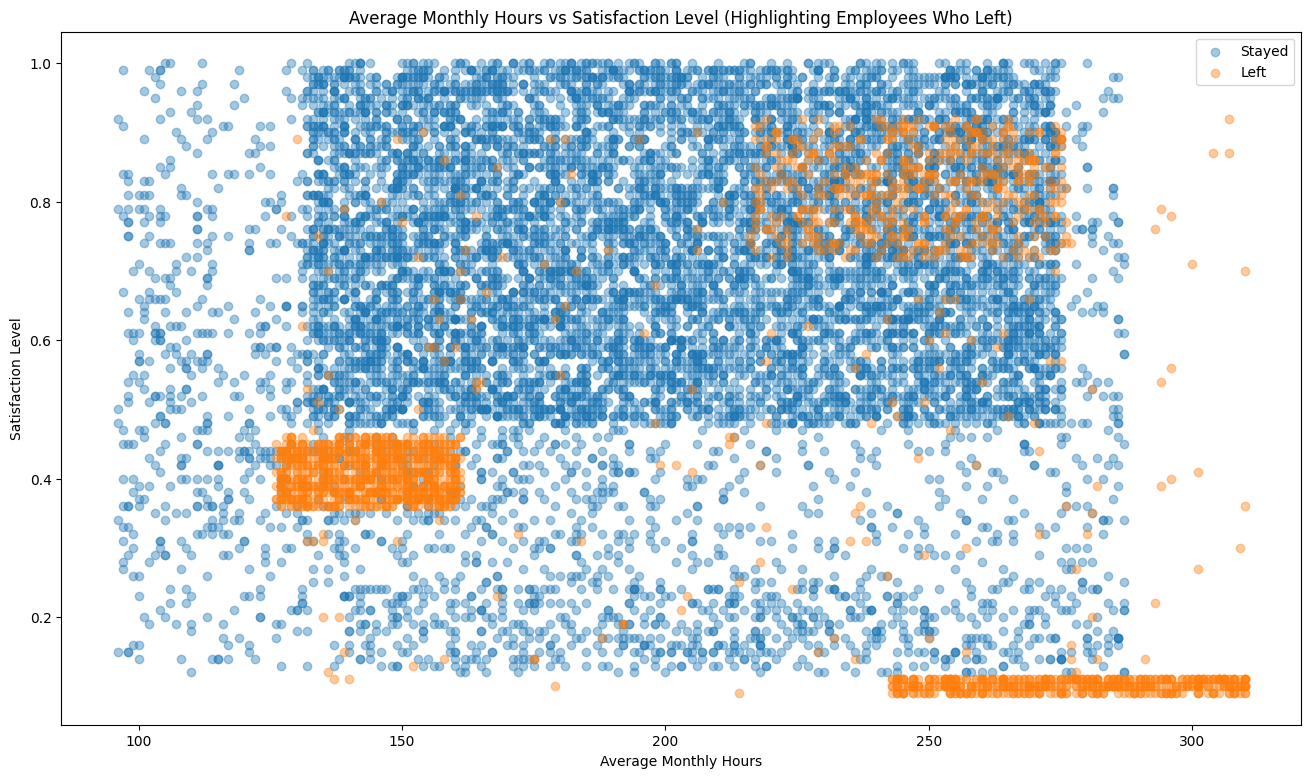

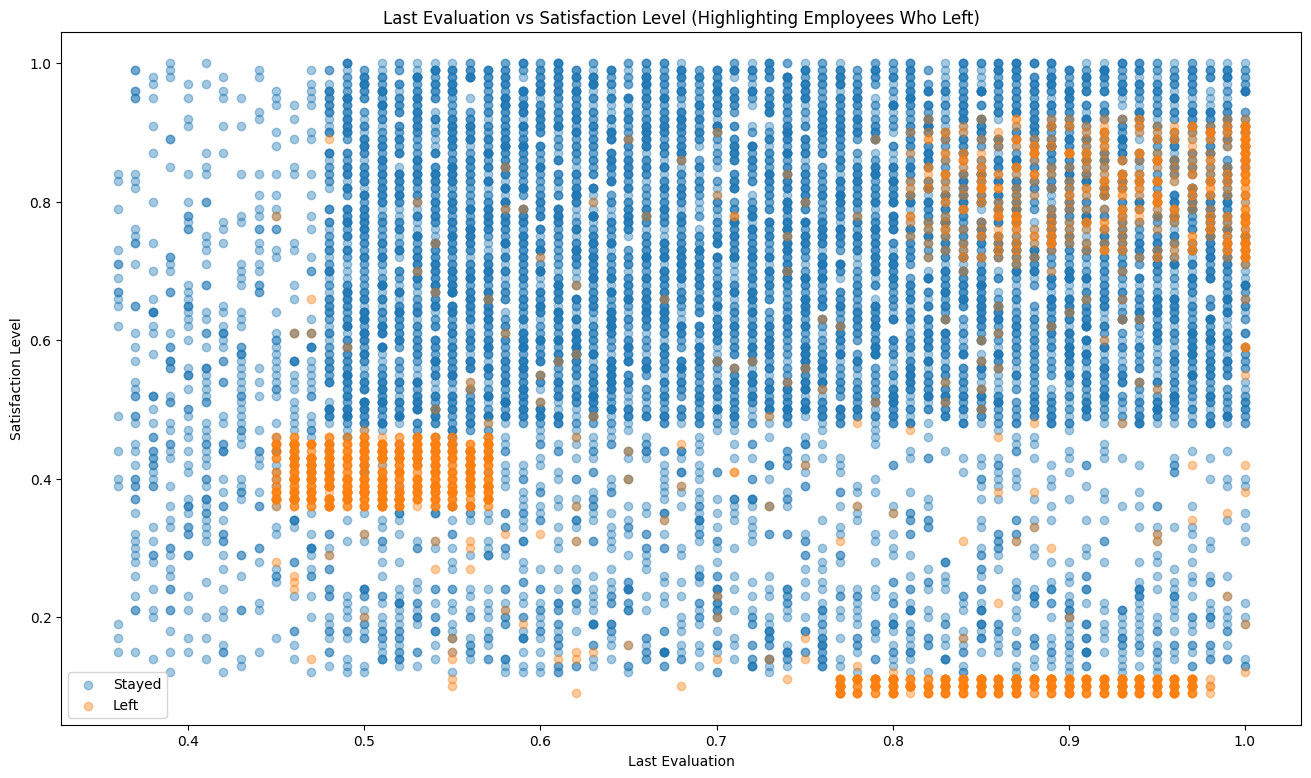

In [16]:
column_names = ['average_monthly_hours', 'last_evaluation', 'satisfaction_level']
column_titles = ['Average Monthly Hours', 'Last Evaluation', 'Satisfaction Level']

for index_X in range(len(column_names)):
  for index_Y in range(index_X + 1, len(column_names)):
    scatter_plot_comparison(df1, column_names[index_X], column_names[index_Y], column_titles[index_X], column_titles[index_Y])


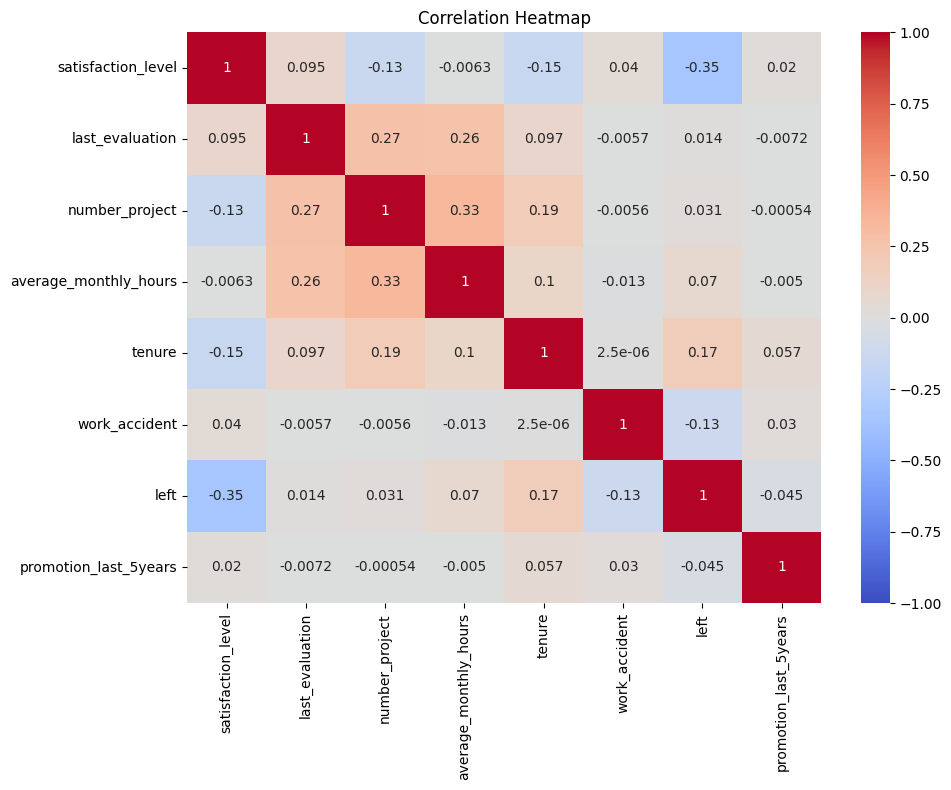

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    df1.corr(numeric_only=True),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap="coolwarm"
)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [77]:
from sklearn.preprocessing import StandardScaler

df_left = df1[df1['left'] == 1].copy()
cluster_features = ['last_evaluation', 'number_project', 'tenure', 'average_monthly_hours', 'satisfaction_level']
df_cluster = df_left[cluster_features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

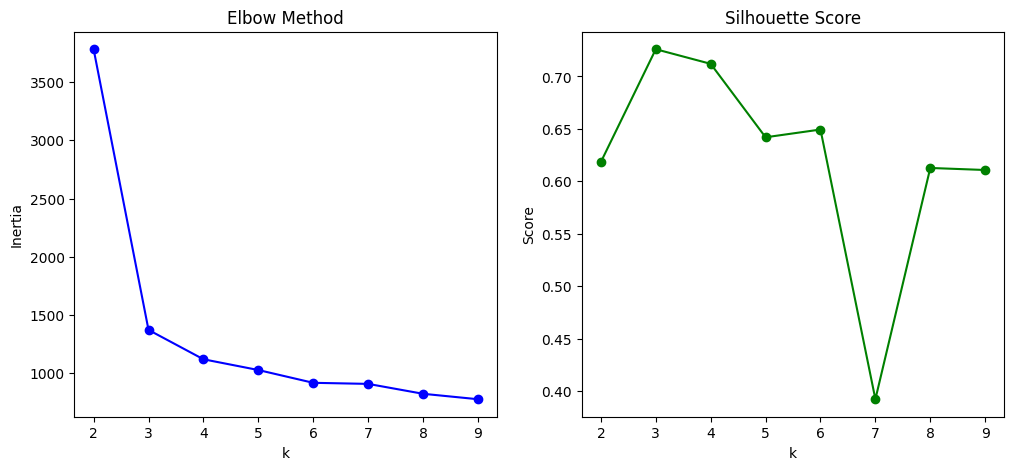

In [78]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
silhouette = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df_scaled, kmeans.labels_))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, 'bo-')
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette, 'go-')
plt.title("Silhouette Score")
plt.xlabel("k")
plt.ylabel("Score")

plt.show()

In [79]:
final_k = 3  # best value from elbow/silhouette
kmeans = KMeans(n_clusters=final_k, random_state=42)
labels = kmeans.fit_predict(df_scaled)
df_left['cluster'] = labels

# Profiling
cluster_profiles = df_left.groupby('cluster')[cluster_features].mean()
print(cluster_profiles)

         last_evaluation  number_project    tenure  average_monthly_hours  \
cluster                                                                     
0               0.524309        2.127072  3.007735             148.106077   
1               0.860917        6.150459  4.086239             272.855046   
2               0.911959        4.537893  5.136784             243.454713   

         satisfaction_level  
cluster                      
0                  0.414619  
1                  0.119982  
2                  0.805841  


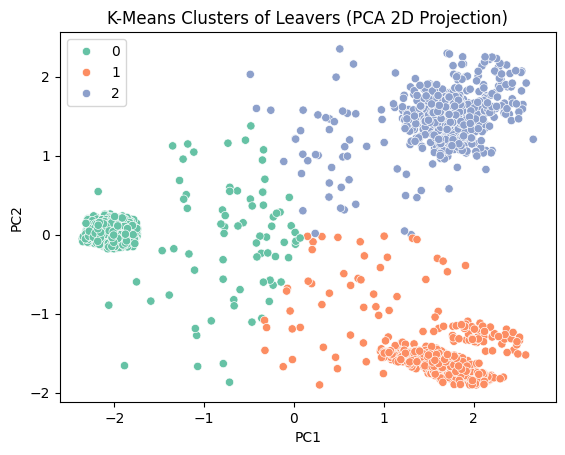

In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set2')
plt.title("K-Means Clusters of Leavers (PCA 2D Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [82]:
# Get centroids
centroids = kmeans.cluster_centers_

# Compute distances of each point to its assigned cluster's centroid
distances = np.linalg.norm(df_scaled - centroids[labels], axis=1)

# Add distances to DataFrame
df_left['distance_to_centroid'] = distances

# Choose a threshold per cluster (e.g., 75th percentile per cluster)
core_points = []

for cluster in range(final_k):
    cluster_mask = df_left['cluster'] == cluster
    cluster_distances = df_left.loc[cluster_mask, 'distance_to_centroid']
    threshold = cluster_distances.quantile(0.9)  # or 0.80 or 0.60
    core_mask = cluster_mask & (df_left['distance_to_centroid'] <= threshold)
    core_points.append(df_left.loc[core_mask])

# Concatenate all core points
df_cores = pd.concat(core_points)

# Get descriptive statistics
core_profiles = df_cores.groupby('cluster')[cluster_features].mean()
print(core_profiles)


         last_evaluation  number_project    tenure  average_monthly_hours  \
cluster                                                                     
0               0.511497        2.000000  3.000000             143.874847   
1               0.872408        6.230612  4.100000             276.481633   
2               0.923326        4.603696  5.203285             247.283368   

         satisfaction_level  
cluster                      
0                  0.408687  
1                  0.101592  
2                  0.818275  


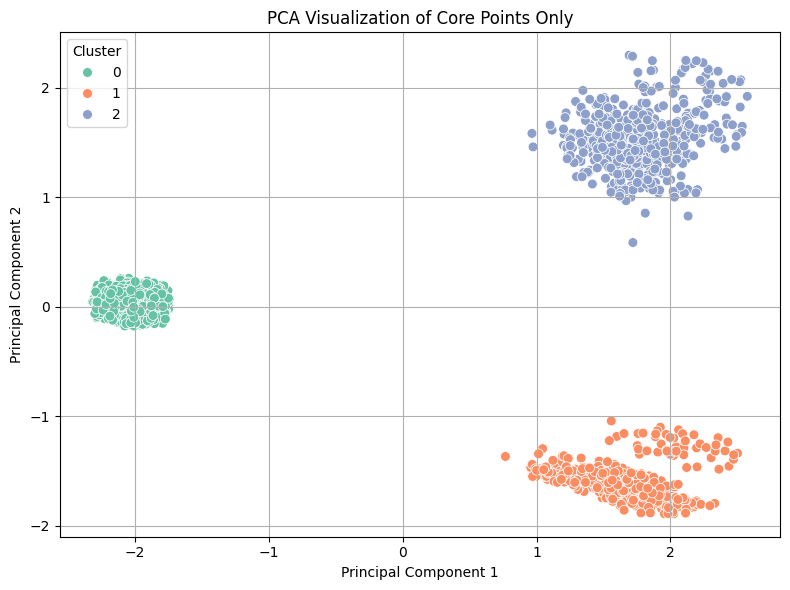

In [83]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Re-standardize just in case
X_cores = df_cores[cluster_features]
X_cores_scaled = scaler.transform(X_cores)

# Apply PCA to core points
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cores_scaled)

# Add PCA coordinates for plotting
df_cores['pca1'] = X_pca[:, 0]
df_cores['pca2'] = X_pca[:, 1]

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cores, x='pca1', y='pca2', hue='cluster', palette='Set2', s=50)
plt.title("PCA Visualization of Core Points Only")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [84]:
agg_funcs = {feature: ['min', 'max'] for feature in cluster_features}

# Group by cluster and compute min and max
summary = df_cores.groupby('cluster').agg(agg_funcs)

# Count the number of rows per cluster separately
counts = df_cores['cluster'].value_counts().sort_index()
summary['cluster_size'] = counts

summary


last_evaluation       number_project     tenure      \
                    min   max            min max    min max   
cluster                                                       
0                  0.45  0.57              2   2      3   3   
1                  0.74  0.98              5   7      4   5   
2                  0.78  1.00              4   6      5   6   

        average_monthly_hours      satisfaction_level       cluster_size  
                          min  max                min   max               
cluster                                                                   
0                         126  161               0.36  0.46          815  
1                         243  310               0.09  0.11          490  
2                         206  307               0.63  0.92          487

In [69]:
df_reg = df1.copy()

df_reg['salary'] = df_reg['salary'].astype('category').cat.set_categories(['low', 'medium', 'hihgh']).cat.codes
df_reg = pd.get_dummies(df_reg, drop_first=False)
df_reg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [ ]:
y = df_reg['left']
X = df_reg.drop('left', axis=1)
print(y.head())
print(X.head())

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64
   satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0          False   
1       6              0                      0       1          False   
2       4              0                      0       1          False   
3       5              0                      0       0          False   
4       3              0                      0       0          False   

   depar

In [ ]:
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [ ]:
logistic_clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)

In [ ]:
y_pred = logistic_clf.predict(X_test)

In [ ]:
def evaluate_model(y_true, y_pred):
  confussion_matrix = confusion_matrix(y_test, y_pred)
  ConfusionMatrixDisplay(confussion_matrix, display_labels=logistic_clf.classes_).plot()
  plt.show()
  print(classification_report(y_test, y_pred))

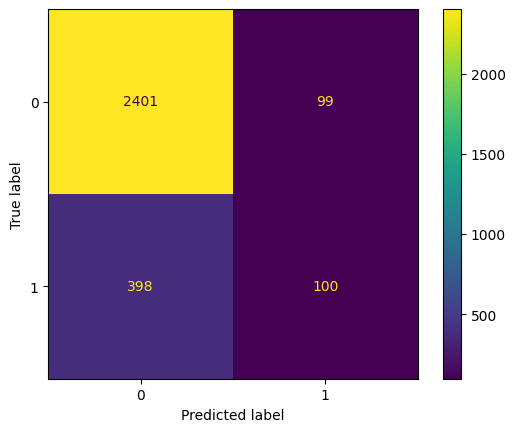

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2500
           1       0.50      0.20      0.29       498

    accuracy                           0.83      2998
   macro avg       0.68      0.58      0.60      2998
weighted avg       0.80      0.83      0.80      2998



In [ ]:
evaluate_model(y_test, y_pred)

In [ ]:
tree = DecisionTreeClassifier(random_state=42)

cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [1, 2, 5],
             'min_samples_split': [2, 4, 6]
             }

scoring = ['accuracy', 'precision', 'recall', 'f1']

tree_clf_cv = GridSearchCV(tree, cv_params, scoring=scoring, refit='f1', cv=5)

In [ ]:
tree_clf_cv.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': [4, 6, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 4, ...]}"
,scoring,"['accuracy', 'precision', ...]"
,n_jobs,None
,refit,'f1'
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [ ]:
tree_clf_cv.best_params_

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [ ]:
tree_clf_cv.best_score_

np.float64(0.9452002234137588)

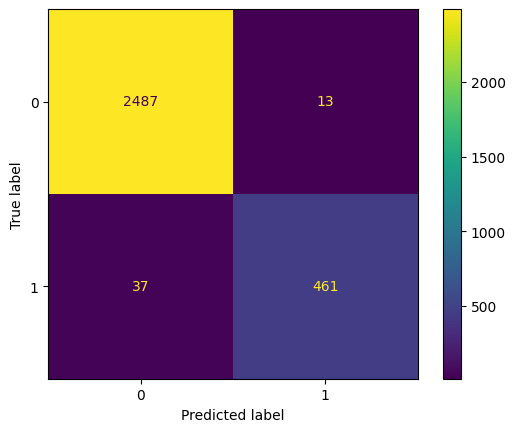

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2500
           1       0.97      0.93      0.95       498

    accuracy                           0.98      2998
   macro avg       0.98      0.96      0.97      2998
weighted avg       0.98      0.98      0.98      2998



In [ ]:
y_pred = tree_clf_cv.predict(X_test)
evaluate_model(y_test, y_pred)

In [ ]:
forest = RandomForestClassifier(random_state=42)

cv_params = {'max_depth': [3, 5, None],
             'max_features': [0.7, 1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1, 3],
             'min_samples_split': [2, 4],
             'n_estimators': [300, 500],
             }

scoring = ['accuracy', 'precision', 'recall', 'f1']

forest_clf_cv = GridSearchCV(forest, cv_params, scoring=scoring, refit='f1', cv=5)

In [ ]:
%%time
forest_clf_cv.fit(X_train, y_train)

CPU times: total: 20min 6s
Wall time: 20min 30s


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [3, 5, ...], 'max_features': [0.7, 1.0], 'max_samples': [0.7, 1.0], 'min_samples_leaf': [1, 3], ...}"
,scoring,"['accuracy', 'precision', ...]"
,n_jobs,None
,refit,'f1'
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [ ]:
forest_clf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
forest_clf_cv.best_score_

np.float64(0.9507203306704282)

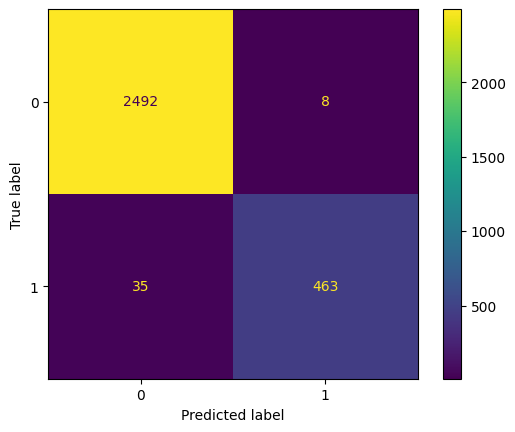

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2500
           1       0.98      0.93      0.96       498

    accuracy                           0.99      2998
   macro avg       0.98      0.96      0.97      2998
weighted avg       0.99      0.99      0.99      2998



In [ ]:
y_pred = forest_clf_cv.predict(X_test)
evaluate_model(y_test, y_pred)

In [ ]:
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

cv_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 150, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score, zero_division=0),
    'f1': make_scorer(f1_score, zero_division=0)
}

xgb_clf_cv = GridSearchCV(xgb, cv_params, scoring=scoring, refit='f1', cv=5)

In [ ]:
%%time
xgb_clf_cv.fit(X_train, y_train)

CPU times: total: 8min 2s
Wall time: 1min 7s


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.8, 1.0], 'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], 'n_estimators': [50, 150, ...], ...}"
,scoring,"{'accuracy': make_scorer(a...hod='predict'), 'f1': make_scorer(f...ro_division=0), 'precision': make_scorer(p...ro_division=0), 'recall': make_scorer(r...ro_division=0)}"
,n_jobs,None
,refit,'f1'
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [ ]:
xgb_clf_cv.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.2,
 'max_depth': 7,
 'n_estimators': 50,
 'subsample': 1.0}

In [ ]:
xgb_clf_cv.best_score_

np.float64(0.9484887319885477)

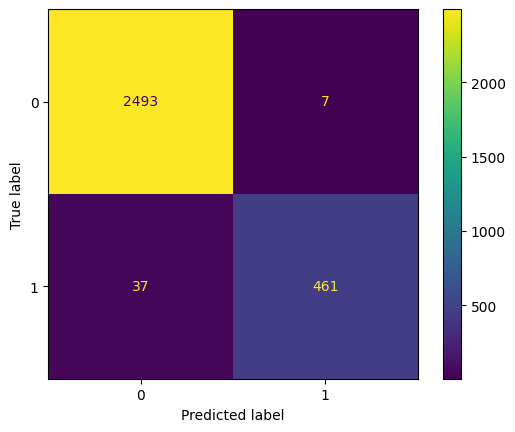

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2500
           1       0.99      0.93      0.95       498

    accuracy                           0.99      2998
   macro avg       0.99      0.96      0.97      2998
weighted avg       0.99      0.99      0.99      2998



In [ ]:
y_pred = xgb_clf_cv.predict(X_test)
evaluate_model(y_test, y_pred)